# One Sample T-Test - Lab

## Introduction
Just as you previously used the t distribution to provide confidence intervals on estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a complete one sample t-test analysis and describe the results


### Exercise 1: 

Create a function in python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using seaborn of the distribution to check for normality.

In [12]:
import numpy as np
from scipy import stats 
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
def one_sample_ttest(sample, popmean, alpha):
    """
    Returns:
    - t-value
    - t-critical value
    - p-value
    """
    import numpy as np
    from scipy import stats 
    import math
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Visualize sample distribution for normality 
    sns.set(color_codes=True)
    sns.set(rc={'figure.figsize':(8,6)})
    sns.distplot(sample)
    
    # Population mean
    mu = popmean
    
    # Sample mean (x̄) using NumPy mean()
    x_bar = np.mean(sample)
    
    # Sample Standard Deviation (sigma) using Numpy
    sigma = np.std(sample)
    
    # Degrees of freedom
    df = len(sample)-1
    
    # Calculate the critical t-value
    t_crit = np.round(stats.t.ppf(1 - alpha, df=df),4)
    
    # Calculate the t-value and p-value      
    results = stats.ttest_1samp(a= sample, popmean=mu)
    t = round(results[0], 4)
    p = round(results[1], 4)
    
    # return results
    print(f"t-statistic: {t}\ncritical t-value: {t_crit}\np-value: {p}")
    if (results[0]>t_crit) and (results[1]<0.05):
        print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
               round(results[0], 4), "and p-value =", np.round((results[1]), 4))
    else:
        print ("Null hypothesis is Accepted")
    return t,t_crit,p

### Exercise 2:

Use the function created in exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online- course, on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternate hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t and p values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

t-statistic: 12.6876
critical t-value: 1.7291
p-value: 0.0
Null hypothesis rejected. Results are statistically significant with t-value = 12.6876 and p-value = 0.0


C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(12.6876, 1.7291, 0.0)

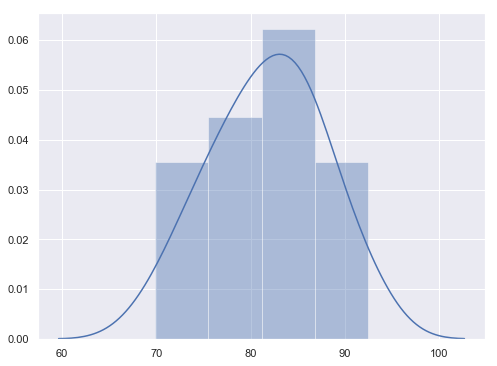

In [14]:
sample = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
          78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]
popmean = 65
alpha = 0.05
one_sample_ttest(sample, popmean, alpha)

t-statistic: 13.2021
critical t-value: 1.7291
p-value: 0.0
Null hypothesis rejected. Results are statistically significant with t-value = 13.2021 and p-value = 0.0


C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(13.2021, 1.7291, 0.0)

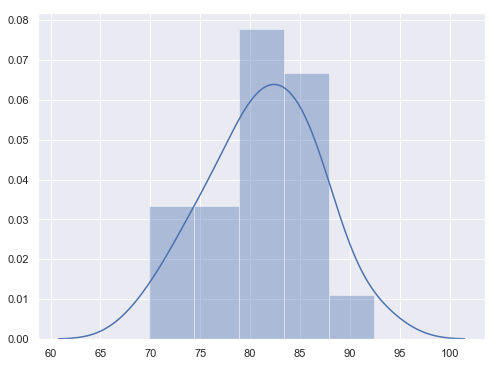

In [15]:
sample2 = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
          78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]
one_sample_ttest(sample2, popmean, alpha)

In [25]:
x_bar = np.mean(sample)

# can only do Simple Effect Size b/c pop. std. dev. is unknown
diff = round(x_bar - popmean, 2)
print(f"Simple effect size: {diff}\nAfter taking the online course, test scores generally improve by {diff}")

Simple effect size: 16.8
After taking the online course, test scores generally improve by 16.8


## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 